
# Red de colaboraciones del Instituto de Investigaciones Biomédicas de la UNAM
## Datos

Los nodos de la siguiente red corresponden a investigadores adscritos al IIBO de la UNAM que aparecen como autores en distintas publicaciones, las cuales se extrajeron de PUBMED contabilizando el período delos ultimos 40 años.  

Los enlaces corresponden a coautorías entre los investigadores del IIBO. 


##Método de obtención de los datos

Para extraer la información requerida para construir la red, de cada referencia bibliográfica presente en el archivo .txt descargado de PUBMED, se obtuvieron únicamente los investigadores con afiliación al IIBO. Posteriormente, se hicieron combinaciones de cada lista de autores del IIBO asociada a cada artículo, para obtener todos los enlaces posibles. A continuación se muestra el código realizado para procesar los datos. 

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import binom, poisson
from itertools import combinations
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving pubmed-Universida-set.txt to pubmed-Universida-set (3).txt


In [ ]:
#lee el archivo
ruta = '/content/pubmed-Universida-set.txt'
f = open(ruta)
lineas = f.readlines()
f.close()

In [ ]:
#remueve "\n"
lineas_2 = []
for linea in lineas:
    x = linea.replace("\n", "")
    lineas_2.append(x)

In [ ]:
#se crea un diccionario de los artículos con los autores y sus afiliaciones respectivas
ar = 0
au = 0
ad = 0
aut = {}
ads = {}
for k,linea in enumerate(lineas_2):
    if linea[:2] == 'TI':
        aut[ar] = {}
        ar += 1
    if linea[:5] == 'AU  -':
        au = linea[6:]
        aut[ar - 1][au] = []
    if linea[:2] == 'AD':
        aut[ar - 1][au].append(linea[6:])
        j = 1
        cadena = '      '
        while cadena == '      ':
            aut[ar - 1][au][-1] = aut[ar - 1][au][-1] + lineas_2[k+j][6:]
            j += 1
            cadena = lineas_2[k+j][:6]

In [ ]:
# se crea una lista únicamente con los autores de biomedicas
biomedicas = []

N = len(aut)
cadena = 'Instituto de Investigaciones Biom'
for i in range(N):
    biomedicas_2 = []
    for autor in list(aut[i]):
        lista = aut[i][autor]
        for adscripcion in lista:
            if cadena in adscripcion:
                biomedicas_2.append(autor)
    biomedicas.append(biomedicas_2)

In [ ]:
# se separan los autores únicos o los pares de autores que salen en cada publicación
colaboraciones_uno = []
colaboraciones_dos = []
for i in biomedicas:
    if len(i) == 1:
        colaboraciones_uno.append(tuple(i))
    if len(i) == 2:
        colaboraciones_dos.append(tuple(i))

In [ ]:
# se crea la lista de enlaces de la red
colaboraciones = []
for i in biomedicas:
    if len(i) == 1 or len(i) == 2:
        continue
    else:
        z = tuple(combinations(i, 2))
        colaboraciones.append(z)

In [ ]:
# se transforma la lista 
colaboraciones_final =[]
for colaboracion in colaboraciones:
    for i in colaboracion:
        colaboraciones_final.append(i)

In [ ]:
#Se crea la red
G = nx.Graph()
G.add_edges_from(colaboraciones_final)
G.add_edges_from(colaboraciones_dos)
G.remove_edges_from(nx.selfloop_edges(G))

## Propiedades de la red
### Propiedades generales de la red

In [ ]:
# calcula diámetro para distancia promedio
caminos = []
for componente in nx.connected_components(G):
  caminos.append(nx.average_shortest_path_length(nx.subgraph(G, componente)))


In [ ]:
# calcula diámetro para componente conexa más grande
componentes = []
for componente in nx.connected_components(G):
  componentes.append(nx.diameter(nx.subgraph(G, componente)))

In [ ]:
print("Estadísticas de la red construida ")
print("Número de nodos: ", len(G.nodes))
print("Número de enlaces: ", len(G.edges))
print("Grado promedio: ", len(G.edges)/len(G.nodes))
print("Clustering promedio: ", nx.average_clustering(G))
print("Diámetro: ", max(componentes)) # Se toma la componente conexa más grande
print("Distancia promedio: ", max(caminos)) # Se toma la componente conexa más grande

Estadísticas de la red construida 
Número de nodos:  1238
Número de enlaces:  6303
Grado promedio:  5.091276252019386
Clustering promedio:  0.7882558066747588
Diámetro:  11
Distancia promedio:  4.375922936174793


### Gráfica de medidas de centralidad



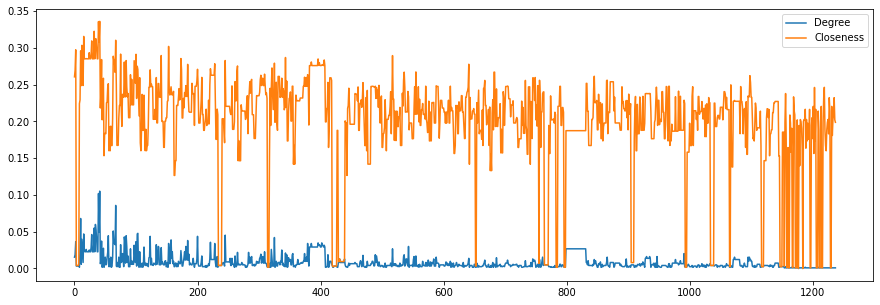

In [ ]:
diccionario = nx.degree_centrality(G)
d = np.array([diccionario[i] for i in G])

diccionario = nx.closeness_centrality(G)
c = np.array([diccionario[i] for i in G])




plt.figure(figsize = [15, 5])
plt.plot(d, label = 'Degree')
plt.plot(c, label = 'Closeness')


plt.legend()

### Visualización de un subconjunto de la red
Se realizan un par de visualizaciones donde el tamaño de los nodos está en función de la centralidad de grado y la centralidad de cercanía. 

In [ ]:
diccionario = nx.degree_centrality(G)

lista = [diccionario[i] for i in G]

sizes = np.array(lista)

sizes = sizes[250:750]

In [ ]:
diccionario_2 = nx.closeness_centrality(G)

lista_2 = [diccionario_2[i] for i in G]

sizes_2 = np.array(lista_2)

sizes_2 = sizes_2[250:750]

In [ ]:
nodos = list(G.nodes)

In [ ]:
nodos = nodos[250:750]

In [ ]:
H = nx.subgraph(G, nodos)

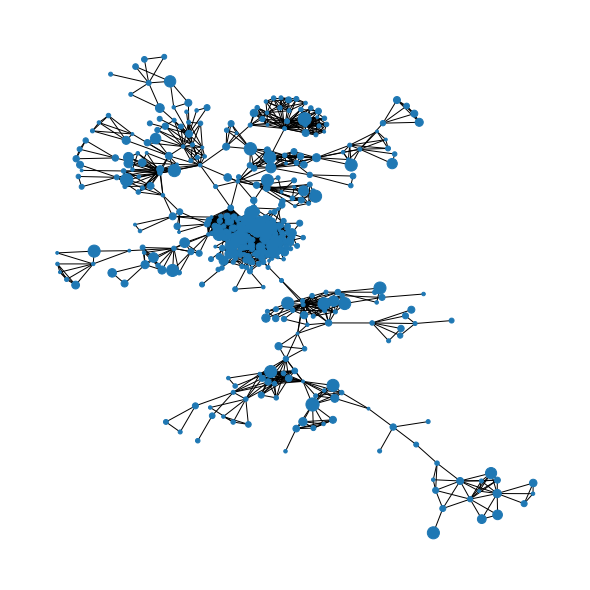

In [ ]:
plt.figure(figsize = [8,8])

nx.draw_kamada_kawai(H, node_size = 5000*sizes)

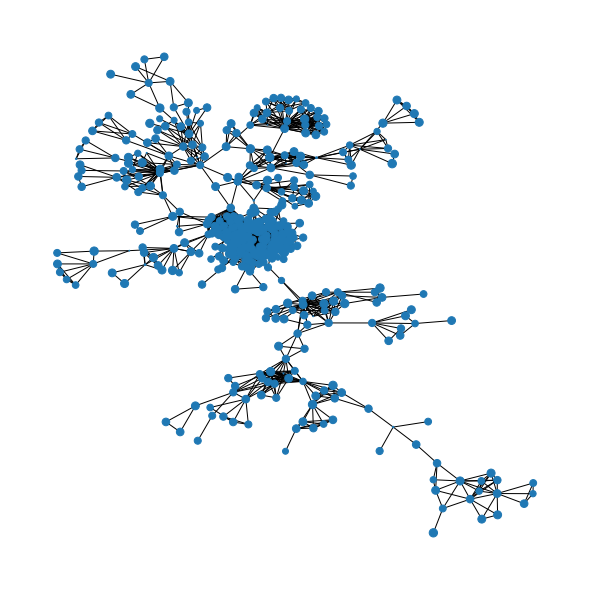

In [ ]:
plt.figure(figsize = [8,8])

nx.draw_kamada_kawai(H, node_size = 250*sizes_2)

### Distribución de grado


In [ ]:
diccionario = dict(G.degree)
grados = [diccionario[nodo] for nodo in G]

In [ ]:
df = pd.DataFrame([diccionario]).T
df.columns = ['Degree']

,Degree
Guzmán-Gutiérrez SL,19
Silva-Miranda M,23
Espitia C,45
Sánchez-Ramírez E,4
Alarcón Del Carmen A,4
...,...
Galván SC,1
Cárdenas C,1
De Leon DC,1
Ortega-Hernando A,1


In [ ]:
y, x = np.histogram(grados, bins = range(max(grados)+1), density = True )

In [ ]:
K = max(grados)

Text(0.5, 0, 'k')

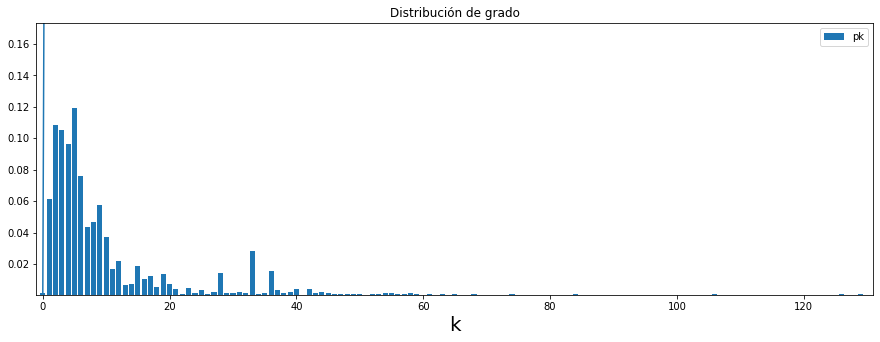

In [ ]:
N = 1829
p = 0.001
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1]) 
#poisson.pmf(x[:-1], 4.29)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim([0.5*y[y>0].min(),1.45*y.max()])
#plt.ylim([0.5*y[y>0].min(),2*y.max()])
#plt.xlim([0,100])
plt.xlim([-1,131])
plt.legend()
plt.title('Distribución de grado')
plt.xlabel('k', size = 20)

### Interpretación


A la luz de la red obtenida, se puede observar que la mayor parte de los nodos tienen como grado un valor de entre 0 y 35, mientras que hay muy pocos nodos que contienen una gran cantidad de enlaces, resaltando un par con más de 120 enlaces. También resalta un clustering relativamente alto, de 0.78 y un diámetro alto, de 11, lo cual nos habla de que hay una parte importante de investigadores asociados al instituto que no colaboran. 

##Red aleatoria

In [ ]:
df = pd.DataFrame([diccionario]).T
df.columns = ['Degree']


,Degree
Guzmán-Gutiérrez SL,19
Silva-Miranda M,23
Espitia C,45
Sánchez-Ramírez E,4
Alarcón Del Carmen A,4
...,...
Galván SC,1
Cárdenas C,1
De Leon DC,1
Ortega-Hernando A,1


In [ ]:
y, x = np.histogram(grados, bins = range(max(grados)+1), density = True )

In [ ]:
K = max(grados)

Text(0.5, 0, 'k')

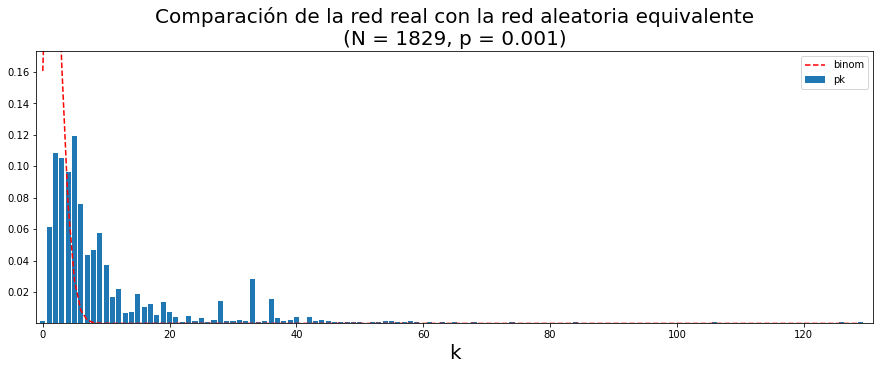

In [ ]:
N = 1829
p = 0.001
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], binom.pmf(x[:-1], N-1, p), 'r--', label = 'binom') 
#poisson.pmf(x[:-1], 4.29)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim([0.5*y[y>0].min(),1.45*y.max()])
#plt.ylim([0.5*y[y>0].min(),2*y.max()])
#plt.xlim([0,100])
plt.xlim([-1,131])
plt.legend()
plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.3f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)

El modelo de red aleatoria no encaja del todo, pues considerando el contexto de las colaboraciones, es natural que los investigadores adscritos a un instituto tengan mayor afinidad a colaborar por grupos específicos o por gente de su departamento. 

##Red libre de escala

In [ ]:
y0, x0 = np.histogram(Degree,
                      bins = range(int(K) + 2),
                      density = True)

In [ ]:
kmin = 1

D = Degree[Degree >= kmin]

alpha = 1 + len(D)*( np.log(D/kmin).sum() )**(-1.)

In [ ]:
alpha

1.5479529107369248

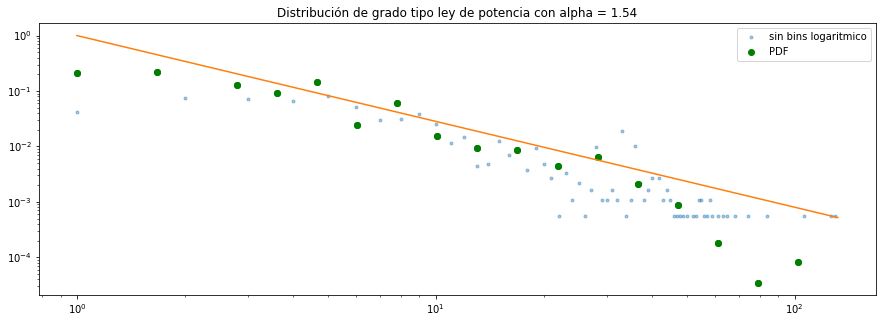

In [ ]:
log_bins = np.logspace(0, np.log10(K+2), 20)

y, x = np.histogram(Degree,
                    bins = log_bins,
                    density = True,
                    )

plt.figure(figsize = [15,5])
plt.plot(x0[:-1], y0, '.', alpha = .4)

plt.plot(x[:-1], y, 'go')
plt.plot(x[:-1], y, 'go')
plt.plot(x, x**(-alpha))
plt.xscale('log')
plt.yscale('log')
plt.title("Distribución de grado tipo ley de potencia con alpha = 1.54")
plt.legend(['sin bins logaritmico', 'PDF' ])

La red cumple la propiedad de mundo pequeño, en el sentido de las colaboraciones, pues hay una pequeña cantidad de investigadores que acumulan una gran cantidad de colaboraciones, dado que tienen una mayor antiguedad. 

## Proceso
Percolación en la red

In [ ]:
def percolacion_red(G,f,ataque=False):
    num_nodos_a_remover = int(f * G.number_of_nodes())

    if(ataque):
        nodos = [nodo for nodo,grado in sorted(G.degree(),key=lambda item:item[1],reverse=True)]
        nodos_a_remover = nodos[0:num_nodos_a_remover]
    else:
        nodos = list(G.nodes)
        nodos_a_remover = random.sample(nodos,num_nodos_a_remover)

    G.remove_nodes_from(nodos_a_remover)
    tamanio_max_comp = len(max(nx.connected_components(G),key=len))

    return tamanio_max_comp

In [ ]:
def experimento_percolacion_redes(f_valores,repeticiones,ataque,generar_red_callback,*args):
    # listas donde se guardaran los resultados 
    # de las simulaciones
    promedios_tamanio_max_comp = []

    for f in f_valores:
        resultados_repeticiones_tamanio_max_comp = []
        for repeticion in range(repeticiones):
            # se crea una red ejecutando el callback
            # y pasándole los argumentos que necesita
            G = generar_red_callback(*args) 
            tamanio_comp = percolacion_red(G,f,ataque)
            resultados_repeticiones_tamanio_max_comp.append(tamanio_comp)

        promedio_tamanio_max_comp = np.mean(resultados_repeticiones_tamanio_max_comp)
        promedios_tamanio_max_comp.append(promedio_tamanio_max_comp)

    return promedios_tamanio_max_comp

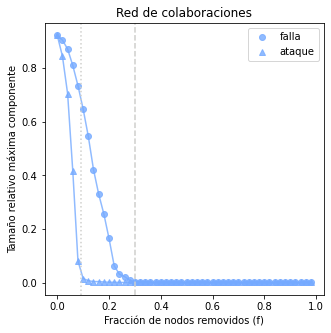

In [ ]:
N = G.number_of_nodes()

# correr experimento de percolación

# parámetros experimentos
f_valores = np.arange(0,1,step=0.02)
repeticiones = 1

# corremos los experimentos y los guardamos
# a la función experimento_percolacion_redes se le pasa como argumento
# "generar_red_callback" una función anónima o lambda que recibe una red como único argumento 
# y regresa la misma red. A esta función anónima se le pasa una copia de la red creada
resultado_real_falla = experimento_percolacion_redes(f_valores,repeticiones,False,lambda red: red,G.copy())
resultado_real_ataque = experimento_percolacion_redes(f_valores,repeticiones,True,lambda red: red,G.copy())

# graficar resultados
x = f_valores
y1 = np.array(resultado_real_falla)/N
y2 = np.array(resultado_real_ataque)/N

plt.figure(figsize=(5,5))

plt.plot(x,y1,'o',alpha=0.8,label='falla',color='#75AAFF')
plt.plot(x,y1,'-',alpha=0.8,color='#75AAFF')
plt.plot(x,y2,'^',alpha=0.8,label='ataque',color='#75AAFF')
plt.plot(x,y2,'-',alpha=0.8,color='#75AAFF')
plt.title('Red de colaboraciones')
plt.ylabel('Tamaño relativo máxima componente')
plt.xlabel('Fracción de nodos removidos (f)')
plt.legend()
plt.axvline(x=0.3,color="#CFCFCC",linestyle='--')
plt.axvline(x=0.09,color="#CFCFCC",linestyle=':')
plt.show()

La red evaluada es robusta ante fallas aleatorias, pero se descompone rápidamente ante ataques específicos, lo cual refuerza la idea de que la red elaborada se ajusta a una red libre de escala. Esto nos habla de que hay una cantidad relativamente pequeña de investigadores que colabora con lo demás investigadores del instituto. 

## Conclusión


A partir del análisis realizado, se puede concluir que la red elaborada corresponde a una red libre de escala. Dicho esto, se consideraría que los pocos nodos que cuentan con mayor grado, corresponden a los investigadores con mayor antiguedad del instituto, pues han tenido más tiempo para establecer distintos tipos de colaboración. Por otro lado, se esperaría que los nodos con grado pequeño correspondan a investigadores con poco tiempo en el instituto y que no han tenido el tiempo suficiente para establecerse. 

Por otro lado, también propondría realizar las redes de colaboración de otros institutos de la UNAM, para verificar si las diferencias estructurales de cada red, así como los valores estadísticos, corresponden a diferencias en la dinámica de colaboración arraigadas a cada instituto o a la historia de formación de cada insituto. Otro dato que también podría verificarse, es ver cómo interactúan los institutos entre ellos o con otros institutos extranjeros. 